# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


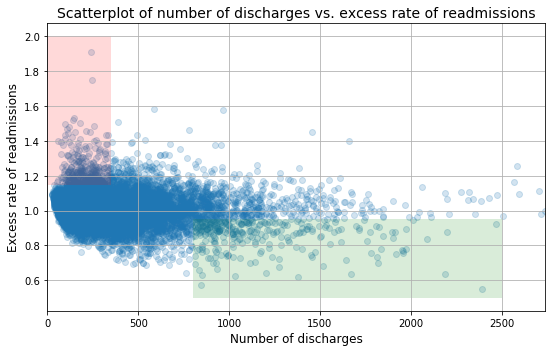

In [160]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

Not trending down with more discharges (The measurements above 2500 were being ignored)
just more points in red area (more hospitals of a smaller size => more outliers)
green variation largely random looking but also cherry picking only part of the high end data

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
cherry picked to support negatively trending result (for example above 2500 mean appear greater than it should be)


The Hypothesis is based on there being a downward trend and statistically significant difference between
an arbitrarily selected part of the small and large data.

The data also does not appear to be perfectly linear as well so there may be an optimal size that is not just "bigger".

The measurements above 2500 were being ignored


-2.85650529438e-05


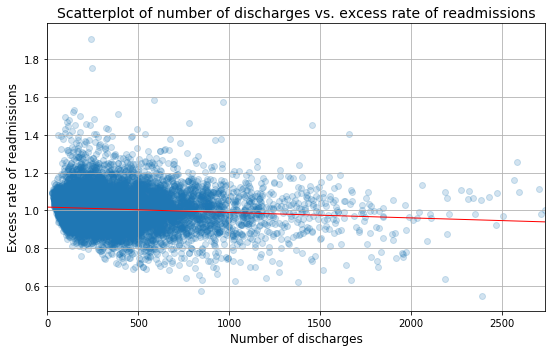

In [78]:
m,b = np.polyfit(x, y, 1)
print(m)

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Generate x-values for bootstrap lines: x
p = np.array([0, 2750])

plt.plot(p,m*p+ b,linewidth=1, alpha=1, color='red')

ax.grid(True)
fig.tight_layout()

slope = -2.85650529438e-05 conf int = [ -3.56492491e-05  -2.16983392e-05]
intercept = 1.01794755795 conf int = [ 1.01523524  1.02053434]


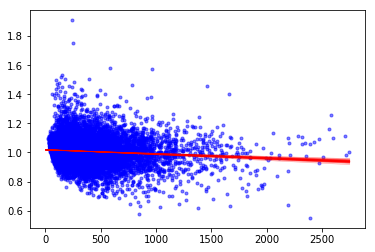

In [25]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    x = np.array(x)
    y = np.array(y)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# Compute the linear regressions
slope, intercept = np.polyfit(x,y,1)

# Perform pairs bootstrap for the linear regression
bs_slope, bs_intercept = \
        draw_bs_pairs_linreg(x,y,size=1000)

# Compute confidence intervals of slopes
slope_conf_int = np.percentile(bs_slope,[2.5,97.5])
intercept_conf_int = np.percentile(bs_intercept,[2.5,97.5])


# Print the results
print('slope =', slope,
      'conf int =', slope_conf_int)
print('intercept =', intercept,
      'conf int =', intercept_conf_int)


# Make scatter plot of 1975 data
_ = plt.plot(x, y, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Label axes
#ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Generate x-values for bootstrap lines: x
d = np.array([0, 2750])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(d,bs_slope[i]*d+ bs_intercept[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

Doesn't really look linear middle seems lowest, need to test to see if the linear model is right (2nd degree look more correct to my eye. Check Residuals

[ -3.54287855e-05  -2.23030843e-05]


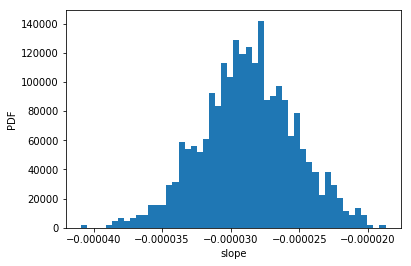

In [90]:
# Perform pairs bootstrap for the linear regression
bs_slope, bs_intercept = draw_bs_pairs_linreg(x,y,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope, [3,97]))

# Plot the histogram
_ = plt.hist(bs_slope, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()


The probability density function shows that there is a negative LINEAR correlation, but also that the width of the confidence interval is about as wide as the slope is overall.

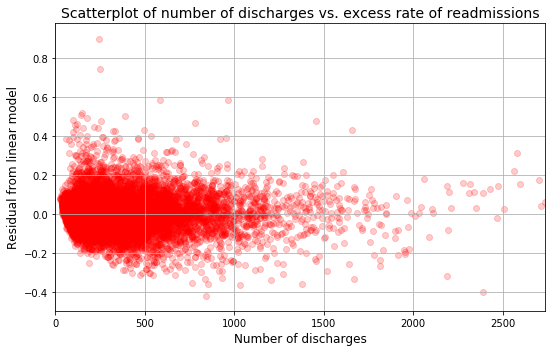

In [37]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
x_p = np.array(x)
predicted = m*x_p+b
y_resid = y-predicted

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y_resid, alpha=0.2, color='red')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Residual from linear model', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()

The residual shows some issues with the linear model on the largest and smallest hospitals

-2.85650529438e-05
[    0.            56.12244898   112.24489796   168.36734694   224.48979592
   280.6122449    336.73469388   392.85714286   448.97959184   505.10204082
   561.2244898    617.34693878   673.46938776   729.59183673   785.71428571
   841.83673469   897.95918367   954.08163265  1010.20408163  1066.32653061
  1122.44897959  1178.57142857  1234.69387755  1290.81632653  1346.93877551
  1403.06122449  1459.18367347  1515.30612245  1571.42857143  1627.55102041
  1683.67346939  1739.79591837  1795.91836735  1852.04081633  1908.16326531
  1964.28571429  2020.40816327  2076.53061224  2132.65306122  2188.7755102
  2244.89795918  2301.02040816  2357.14285714  2413.26530612  2469.3877551
  2525.51020408  2581.63265306  2637.75510204  2693.87755102  2750.        ]


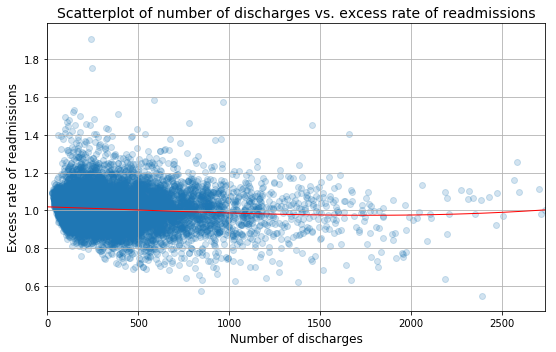

In [49]:
w,n,c,d = np.polyfit(x, y, 3)
print(m)

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Generate x-values for bootstrap lines: x
p = np.linspace(0, 2750)
print(p)

plt.plot(p,w*(p**3)+n*(p**2)+ c*p+d,linewidth=1, alpha=1, color='red')

ax.grid(True)
fig.tight_layout()

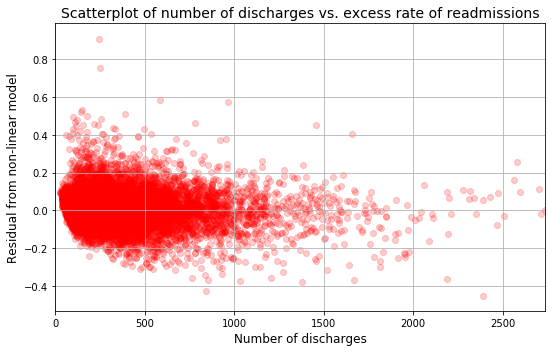

In [55]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
p = np.array(x)
predicted_3 = w*(p**3)+n*(p**2)+ c*p+d
y_resid_3 = np.array(y)-1#predicted_3

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y_resid_3, alpha=0.2, color='red')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Residual from non-linear model', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()

By making the line second order the residual is slightly more evenly distributed around 0. The middle is brought up and the start and end is brought down. Although slightly seeing a more uniform residual is a sign that the data is of a higher order.

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [68]:
print(np.mean(np.array(y)[np.array(x)<100]))
print(np.mean(np.array(y)[np.array(x)>1000]))
print(np.mean(np.array(y)[np.array(x)<1000]))

print(np.mean(np.array(y)[np.array(x)>2000]))
print(np.mean(np.array(y)[np.array(x)<2000]))

1.02261835017
0.979073043478
1.0087305266
1.00292758621
1.00755258613


0.000171076336355


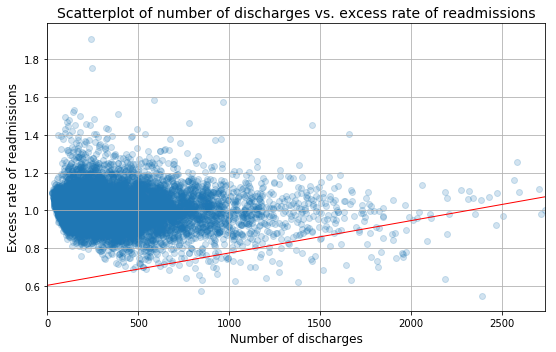

In [153]:
m,b = np.polyfit(np.array(x)[np.array(x)>2000], np.array(y)[np.array(x)>2000], 1)
print(m)

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Generate x-values for bootstrap lines: x
p = np.array([0, 2750])

plt.plot(p,m*p+ b,linewidth=1, alpha=1, color='red')

ax.grid(True)
fig.tight_layout()

mean before and after a arbitrary point is not a satistical analysis, and points can be chosen to make most things seem true. However if it was true there was a absolute linear downward trend you would expect no means to contradict that trend, the points after 2000 releases actually has a lower mean readmittance than hospitals with less than 2000 releases. If you linearly fit the line for hospitals larger than 1500 releases you see the opposite trend as well which goes agains a linear model.The large quantity of smaller hospitals are weighting the average line and hiding the true non-linear attributes of the data.

In [76]:
from scipy import stats

stats.linregress(x, y)

LinregressResult(slope=-2.8565052943822634e-05, intercept=1.0179475579544219, rvalue=-0.093095542875904477, pvalue=1.5022756426614013e-23, stderr=2.8498248278499863e-06)

Shows slow is not likely to be zero pvalue is approximately 0 but does not confirm the  applicability of the data

In [77]:
stats.linregress([1,3], [1,3])

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [89]:
from scipy import stats

stats.linregress(x, (np.array(y)-(m*np.array(x)+b)))

LinregressResult(slope=9.7167634456753621e-19, intercept=-7.1860873285859772e-16, rvalue=3.1805751068202391e-15, pvalue=0.999999999999728, stderr=2.8498248278499884e-06)

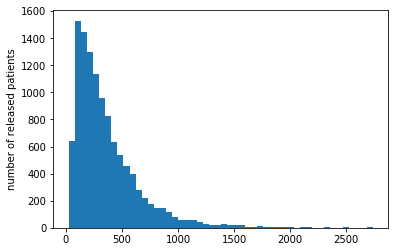

281.0


In [144]:
plt.hist(x,bins=50)
plt.ylabel('number of hospitals')
plt.ylabel('number of released patients')
plt.show()
print(np.median(x))

HYPOTHESIS TEST:
Hypothesis: the data is trending down with higher numers of discharges linear.
-> residual
-> mean decreases over size
    
Pscore of 95% gives a slope range from 
[ -3.55464591e-05  -2.15306622e-05]

Pscore of 95% with an alpha of .01 gives (93%-97%) gives a range from
[ -3.54287855e-05  -2.23030843e-05]

The advantages of using a scatter plot is you can see the trends visual to see if they seem right (easier story telling). It can also show where you have the most data for.
The disadvantages are all the points on top of each other so they are not all visible and selective storytelling is dangerously easy.

Null Hypothesis: given neg slope linear slope what is the likelyhood of the second half (slice by mean since there are so many small hospitals) of the points given the first half of the points (if likelyhood is 0 it should not be a linear function)

7255
4239
slope = -4.54951628413e-05 conf int = [ -6.49726517e-05  -2.46848552e-05]
intercept = 1.0219053597 conf int = [ 1.01784796  1.02577602]
slope = -2.09971088633e-05 conf int = [ -3.30554770e-05  -8.61404330e-06]
intercept = 1.01187710694 conf int = [ 1.00372723  1.01976071]


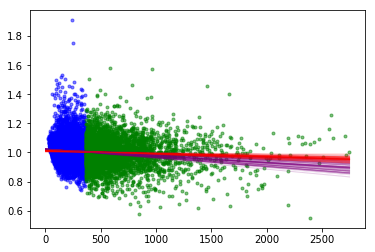

In [154]:
split_point = np.mean(x)

x_first = np.array(x)[np.array(x)<split_point]
x_second = np.array(x)[np.array(x)>=split_point]
y_first = np.array(y)[np.array(x)<split_point]
y_second = np.array(y)[np.array(x)>=split_point]
print(len(x_first))
print(len(x_second))

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    x = np.array(x)
    y = np.array(y)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# Compute the linear regressions
slope_sm, intercept_sm = np.polyfit(x_first,y_first,1)
slope_lg, intercept_lg = np.polyfit(x_second,y_second,1)

# Perform pairs bootstrap for the linear regression
bs_slope_sm, bs_intercept_sm = draw_bs_pairs_linreg(x_first,y_first,size=1000)
bs_slope_lg, bs_intercept_lg = draw_bs_pairs_linreg(x_second,y_second,size=1000)

# Compute confidence intervals of slopes
slope_conf_int_sm = np.percentile(bs_slope_sm,[2.5,97.5])
intercept_conf_int_sm = np.percentile(bs_intercept_sm,[2.5,97.5])
slope_conf_int_lg = np.percentile(bs_slope_lg,[2.5,97.5])
intercept_conf_int_lg = np.percentile(bs_intercept_lg,[2.5,97.5])


# Print the results
print('slope =', slope_sm,
      'conf int =', slope_conf_int_sm)
print('intercept =', intercept_sm,
      'conf int =', intercept_conf_int_sm)
print('slope =', slope_lg,
      'conf int =', slope_conf_int_lg)
print('intercept =', intercept_lg,
      'conf int =', intercept_conf_int_lg)


# Make scatter plot of 1975 data
_ = plt.plot(x_first, y_first, marker='.',
             linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(x_second, y_second, marker='.',
             linestyle='none', color='green', alpha=0.5)

# Label axes
#ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Rate of readmissions compared to average', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# Generate x-values for bootstrap lines: x
d = np.array([0, 2750])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(d,bs_slope_sm[i]*d+ bs_intercept_sm[i],
             linewidth=0.5, alpha=0.2, color='purple')
    plt.plot(d,bs_slope_lg[i]*d+ bs_intercept_lg[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

[ -6.49726517e-05  -2.46848552e-05]
[ -3.30554770e-05  -8.61404330e-06]
[ -6.44652299e-05  -2.52487323e-05]
[ -3.28031976e-05  -9.04483423e-06]


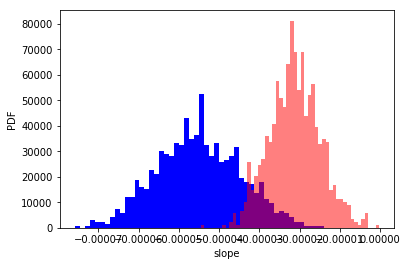

Hypothesis confirmed: with a likelyhood of >2.5% but less than 97.5%
Hypothesis confirmed: with a likelyhood of >3% but less than 97%


In [163]:
# Perform pairs bootstrap for the linear regression
#bs_slope, bs_intercept = draw_bs_pairs_linreg(x,y,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_sm, [2.5,97.5]))
print(np.percentile(bs_slope_lg, [2.5,97.5]))

print(np.percentile(bs_slope_sm, [3,97]))
print(np.percentile(bs_slope_lg, [3,97]))

# Plot the histogram
_ = plt.hist(bs_slope_sm, bins=50, normed=True,color='blue')
_ = plt.hist(bs_slope_lg, bins=50, normed=True,color='red',alpha=.5)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

if(np.percentile(bs_slope_sm, [2.5,97.5])[1]>np.percentile(bs_slope_lg, [2.5,97.5][1])):
    print('Hypothesis confirmed: with a likelyhood of >97.5%')
elif(np.percentile(bs_slope_sm, [2.5,97.5])[1]>np.percentile(bs_slope_lg, [2.5,97.5][0])):
     print('Hypothesis confirmed: with a likelyhood of >2.5% but less than 97.5%')
else:
    print('Hypothesis denied')
   
if(np.percentile(bs_slope_sm, [3,97])[1]>np.percentile(bs_slope_lg, [3,97][1])):
    print('Hypothesis confirmed: with a likelyhood of >97%')
elif(np.percentile(bs_slope_sm, [2.5,97.5])[1]>np.percentile(bs_slope_lg, [2.5,97.5][0])):
    print('Hypothesis confirmed: with a likelyhood of >3% but less than 97%')
else:
    print('Hypothesis denied')

The alpha and normal p-values have the same results for this null hypothesis test. The alpha test has a higher bar for being true, because it adds 1% of uncertainty for the line confirms or refutes the hypothesis. 

The linear hypothesis has met the base line requirement to be confirmed, but I would recommend gathering more data greater than 2000 releases before executing those exact policies. The lack of large datapoints, 'u' shaped regression trend and differences between the high end slopes and low end slopes, mean that combining and verifying some of the smallest hospitals can start, but I would recommend being careful of any merges that result in more than 2000 releases from the same hospital. It is possible that once a hospital gets that large, detailed care from patients decreases.

Construct another plot that conveys the same information in a more direct manner.
You can compose in notebook cells using Markdown:

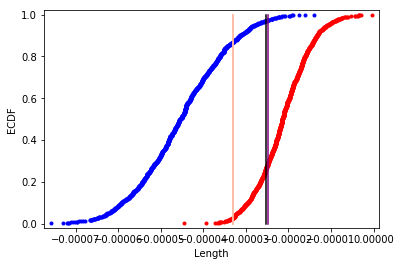

[ 0.87]
[ 0.867]
[ 0.265]
[ 0.295]
overlap low points on high 95%:  [ 10.8]
overlap high points on low 95%:  [ 27.]
overlap low points on high 95% with an alpha of 1:  [10.]
overlap high points on low 95% with an alpha of 1:  [ 23.5]


In [191]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    hush = np.sort(data)

    # y-data for the ECDF: y
    rush = np.arange(1, n+1) / n

    return hush, rush



# Compute ECDF for versicolor data
x_vers_sm, y_vers_sm = ecdf(bs_slope_sm)
x_vers_lg, y_vers_lg = ecdf(bs_slope_lg)

# Generate plot
plt.plot(x_vers_sm,y_vers_sm, marker='.',linestyle = 'none',color='blue')
plt.plot(x_vers_lg,y_vers_lg, marker='.',linestyle = 'none',color='red')

plt.plot([x_vers_sm[y_vers_sm==.97], x_vers_sm[y_vers_sm==.97]], [0, 1], 'k-',color='black')
plt.plot([x_vers_lg[y_vers_lg==.03], x_vers_lg[y_vers_lg==.03]], [0, 1], 'k-',color='orange')

plt.plot([x_vers_sm[y_vers_sm==.975], x_vers_sm[y_vers_sm==.975]], [0, 1], 'k-',color='purple')
plt.plot([x_vers_lg[y_vers_lg==.025], x_vers_lg[y_vers_lg==.025]], [0, 1], 'k-',color='pink')

# Make the margins nice
plt.margins(.02)

# Label the axes
plt.xlabel('Length')
plt.ylabel('ECDF')


# Display the plot
plt.show()

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

print(y_vers_sm[x_vers_sm==find_nearest(x_vers_sm,(x_vers_lg[y_vers_lg==.03]))])
print(y_vers_sm[x_vers_sm==find_nearest(x_vers_sm,(x_vers_lg[y_vers_lg==.025]))])

print(y_vers_lg[x_vers_lg==find_nearest(x_vers_lg,(x_vers_sm[y_vers_sm==.97]))])
print(y_vers_lg[x_vers_lg==find_nearest(x_vers_lg,(x_vers_sm[y_vers_sm==.975]))])

print('overlap low points on high 95%: ',100*(.975-y_vers_sm[x_vers_sm==find_nearest(x_vers_sm,(x_vers_lg[y_vers_lg==.025]))]))
print('overlap high points on low 95%: ',100*(y_vers_lg[x_vers_lg==find_nearest(x_vers_lg,(x_vers_sm[y_vers_sm==.975]))]-.025))

print('overlap low points on high 95% with an alpha of 1: ',100*(.97-y_vers_sm[x_vers_sm==find_nearest(x_vers_sm,(x_vers_lg[y_vers_lg==.03]))]))
print('overlap high points on low 95% with an alpha of 1: ',100*(y_vers_lg[x_vers_lg==find_nearest(x_vers_lg,(x_vers_sm[y_vers_sm==.97]))]-.03))

The Confidence intervals for both the bothe slopes are very similar only varying be .8% on the low value slope and 3.5 on the high values' slope

the Confidence of the overlap is 10.8%-27% without the alpha and 10%-23.5% with the alpha of .01

Even though the high results could be caused by random variation The small percentage and residuals is why I recommend more high level data before enacting policy for that end of the data. The statistical difference between the alphas is small and does not chance my recommendation.

The ECDF and histogram plots help to show some of the overlapping data and therefore are a good addtion to the scatter plot.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

****
### Exercise Results

A. Do you agree with the above analysis and recommendations? Why or why not?
   I do agree with the general results of a downward slope as the number of releases from a hospital increases. I do no fully agree with the conclusion drawn from that however. The existing conclusion was to merge as many hopitals as posible, but that conclusion is biased toward the influence of the much more plentible smallest hospitals. The residuals show how there is a slight upward trend as the hospitals get too large. I would say that the data supports the idea of merging hospitals up until they have about 2000 releases, where a second order fit starts to turn around. The difference of the second order line also show ther is much more variation than that just caused by size, size only accounts for about .01-.02 percent of readmissions. The linear tend seems to show the most benefit at the place where its results are the most suspect, because of lack of high datapoints the trend for that area is driven be the high volume of small hospitals and promises a higher result than it is likely to achieve. 
   
   The linear model was verified as having a 10.8%-27%, and 10%-23.5% with alpha included, statistically significant overlap which is not large enough to change policy on the high end where there are few datapoints, but hospitals with less than 500 releases having a slightly higher rate of readmintance was also confirmed by the second order function whether or not the model should be perfectly linear.
   
   
   The ECDF and histogram plots help to show some of the overlapping data and therefore are good addtions to the scatter plot.

Recap of writings from data collection:

The Hypothesis is based on there being a downward trend and statistically significant difference between
an arbitrarily selected part of the small and large data.

The data also does not appear to be perfectly linear as well so there may be an optimal size that is not just "bigger".

The measurements above 2500 were being ignored

The probability density function shows that there is a negative LINEAR correlation, but also that the width of the confidence interval is about as wide as the slope is overall.

By making the line second order the residual is slightly more evenly distributed around 0. The middle is brought up and the start and end is brought down. Although slightly seeing a more uniform residual is a sign that the data is of a higher order.

HYPOTHESIS TEST:
Hypothesis: the data is trending down with higher numers of discharges linear.
-> residual
-> mean decreases over size
    
Pscore of 95% gives a slope range from 
[ -3.55464591e-05  -2.15306622e-05]

Pscore of 95% with an alpha of .01 gives (93%-97%) gives a range from
[ -3.54287855e-05  -2.23030843e-05]

The advantages of using a scatter plot is you can see the trends visual to see if they seem right (easier story telling). It can also show where you have the most data for.
The disadvantages are all the points on top of each other so they are not all visible and selective storytelling is dangerously easy.

Null Hypothesis: given neg slope linear slope what is the likelyhood of the second half (slice by mean since there are so many small hospitals) of the points given the first half of the points (if likelyhood is 0 it should not be a linear function)

The alpha and normal p-values have the same results for this null hypothesis test. The alpha test has a higher bar for being true, because it adds 1% of uncertainty for the line confirms or refutes the hypothesis. 

The linear hypothesis has met the base line requirement to be confirmed, but I would recommend gathering more data greater than 2000 releases before executing those exact policies. The lack of large datapoints, 'u' shaped regression trend and differences between the high end slopes and low end slopes, mean that combining and verifying some of the smallest hospitals can start, but I would recommend being careful of any merges that result in more than 2000 releases from the same hospital. It is possible that once a hospital gets that large, detailed care from patients decreases.

Construct another plot that conveys the same information in a more direct manner.
You can compose in notebook cells using Markdown:

The Confidence intervals for both the bothe slopes are very similar only varying be .8% on the low value slope and 3.5 on the high values' slope

the Confidence of the overlap is 10.8%-27% without the alpha and 10%-23.5% with the alpha of .01

Even though the high results could be caused by random variation The small percentage and residuals is why I recommend more high level data before enacting policy for that end of the data. The statistical difference between the alphas is small and does not chance my recommendation.

The ECDF and histogram plots help to show some of the overlapping data and therefore are good addtions to the scatter plot.